<a href="https://colab.research.google.com/github/armandossrecife/lp2024-1/blob/main/introducao_ao_pandas_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

É uma biblioteca (open-source) Python usada para manipular (extrair, analisar, limpar, explorar, sumarizar, ...) conjuntos de dados.

https://pandas.pydata.org/

*Estrutura de dados*: Pandas oferece duas estruturas de dados principais: **Series** e **DataFrame**. Uma Series é um array unidimensional que pode conter qualquer tipo de dados, enquanto um DataFrame é uma estrutura de dados tabular bidimensional que consiste em linhas e colunas.

*Manipulação de dados*: Pandas oferece muitas ferramentas para manipular dados, incluindo filtragem, seleção, ordenação, agregação e transformação. Isso permite que você trabalhe facilmente com dados para realizar tarefas comuns de análise de dados.

*Limpeza de dados*: Pandas oferece uma ampla gama de ferramentas para limpeza de dados, incluindo preenchimento de valores nulos, remoção de duplicatas e correção de erros de dados.

*Visualização de dados*: Pandas integra-se bem com a biblioteca de visualização de dados do Python, Matplotlib, permitindo que você crie visualizações poderosas diretamente de seus dados.

*Importação e exportação de dados*: Pandas pode ler e gravar dados em vários formatos, incluindo CSV, Excel, SQL, JSON e muito mais.

Integração com outras bibliotecas Python: Pandas é uma biblioteca muito popular e é frequentemente usada em conjunto com outras bibliotecas Python, como NumPy, Scikit-Learn e TensorFlow, entre outras.


Bibliotecas mais importantes

In [1]:
# importa as principais biblioteca
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Definindo uma classe Grafico para um gráfico genérico de [série temporal](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal#:~:text=Em%20estat%C3%ADstica%2C%20econometria%2C%20matem%C3%A1tica%20aplicada,sequencialmente%20ao%20longo%20do%20tempo.)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class Grafico:
    def __init__(self):
        self.x = None
        self.y = None

    def set_eixo_x(self,x):
      self.x = x

    def set_eixo_y(self,y):
      self.y =y

    def criar_eixo_x(self, inicio, fim, quantidade):
        self.x = np.linspace(inicio, fim, quantidade)

    def calcular_y(self, funcao):
        self.y = funcao(self.x)

    def configura_limites_dos_eixos(self, limite_inferior_x=None, limite_superior_x=None, limite_inferior_y=None, limite_superior_y=None):
        if ((limite_inferior_x) and (limite_superior_x) and (limite_inferior_y) and (limite_superior_y)):
            plt.xlim([limite_inferior_x, limite_superior_x])
            plt.ylim([limite_inferior_y, limite_superior_y])

    def configura_titulo_e_rotulos(self, titulo=None, rotulo_x=None, rotulo_y=None):
        if titulo:
            plt.title(titulo)
        if rotulo_x:
            plt.xlabel(rotulo_x)
        if rotulo_y:
            plt.ylabel(rotulo_y)

    def exibir_grafico(self):
        plt.plot(self.x, self.y)
        plt.show()

## Dados 1 - Tabela simplificada de preços de carros

Exemplo simplificado

In [3]:
# Dicionário contendo informações de carros
dicionario_carros_marcas = {
    'carros': ['Corolla', 'Ranger', 'HB-20', 'IX-35'],
    'anos': [2012, 2015, 2018, 2020],
    'valores': [50000, 90000, 60000, 100000],
    'marcas': ['Toyota', 'Ford', 'Hyundai', 'Hyundai']
}

# Cria um dataframe de carros e marcas
df_carros_marcas = pd.DataFrame(dicionario_carros_marcas)
df_carros_marcas

,carros,anos,valores,marcas
0,Corolla,2012,50000,Toyota
1,Ranger,2015,90000,Ford
2,HB-20,2018,60000,Hyundai
3,IX-35,2020,100000,Hyundai


In [4]:
print(f"O dataframe df_carros_marcas tem {df_carros_marcas.shape[0]} linhas e {df_carros_marcas.shape[1]} colunas")

O dataframe df_carros_marcas tem 4 linhas e 4 colunas


### Selecionando colunas

In [5]:
df_carros_marcas

,carros,anos,valores,marcas
0,Corolla,2012,50000,Toyota
1,Ranger,2015,90000,Ford
2,HB-20,2018,60000,Hyundai
3,IX-35,2020,100000,Hyundai


In [6]:
# Seleciona a coluna carros
df_carros_marcas['carros']

0    Corolla
1     Ranger
2      HB-20
3      IX-35
Name: carros, dtype: object

In [7]:
type(df_carros_marcas['carros'])

pandas.core.series.Series

In [8]:
df_carros_marcas['carros'][2]

'HB-20'

In [9]:
# Seleciona os itens da coluna valores
df_carros_marcas['valores']

0     50000
1     90000
2     60000
3    100000
Name: valores, dtype: int64

In [10]:
# Seleciona as colunas carrros e valores
df_carros_marcas[['carros', 'valores']]

,carros,valores
0,Corolla,50000
1,Ranger,90000
2,HB-20,60000
3,IX-35,100000


In [11]:
type(df_carros_marcas[['carros', 'valores']])

pandas.core.frame.DataFrame

### Convertendo um Dataframe para texto

Salva um dataframe em arquivo .csv

In [12]:
df_carros_marcas.to_csv('carros_marcas.csv')

In [13]:
file_carros_marcas = open('carros_marcas.csv', mode='r')
for linha in file_carros_marcas:
  print(linha, end='')
file_carros_marcas.close()

,carros,anos,valores,marcas
0,Corolla,2012,50000,Toyota
1,Ranger,2015,90000,Ford
2,HB-20,2018,60000,Hyundai
3,IX-35,2020,100000,Hyundai


### Análise básica dos dados de um dataframe (1o dataframe)

In [14]:
# Informacoes sobre as colunas, linhas e tipos
df_carros_marcas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carros   4 non-null      object
 1   anos     4 non-null      int64 
 2   valores  4 non-null      int64 
 3   marcas   4 non-null      object
dtypes: int64(2), object(2)
memory usage: 256.0+ bytes


In [15]:
# Tamanho em linhas e colunas (linhas, colunas)
df_carros_marcas.shape

(4, 4)

In [16]:
df_carros_marcas.describe()

,anos,valores
count,4.00,4.000000
mean,2016.25,75000.000000
std,3.50,23804.761428
min,2012.00,50000.000000
25%,2014.25,57500.000000
50%,2016.50,75000.000000
75%,2018.50,92500.000000
max,2020.00,100000.000000


In [17]:
type(df_carros_marcas.describe())

pandas.core.frame.DataFrame

In [18]:
# Descricao estatistica das colunas com valores numericos
#df_carros_marcas.describe()
df_carros_marcas.describe().applymap('{:.2f}'.format)

,anos,valores
count,4.00,4.00
mean,2016.25,75000.00
std,3.50,23804.76
min,2012.00,50000.00
25%,2014.25,57500.00
50%,2016.50,75000.00
75%,2018.50,92500.00
max,2020.00,100000.00


In [19]:
# Lista so as duas primeiras linhas
df_carros_marcas.head(2)

,carros,anos,valores,marcas
0,Corolla,2012,50000,Toyota
1,Ranger,2015,90000,Ford


In [20]:
# Lista so as duas ultimas linhas
df_carros_marcas.tail(2)

,carros,anos,valores,marcas
2,HB-20,2018,60000,Hyundai
3,IX-35,2020,100000,Hyundai


In [21]:
# Extrai os valores unicos de uma coluna
df_carros_marcas['marcas'].unique()

array(['Toyota', 'Ford', 'Hyundai'], dtype=object)

In [22]:
type(df_carros_marcas['marcas'].unique())

numpy.ndarray

In [23]:
# Valor medio dos dados de uma coluna
df_carros_marcas['valores'].mean()

75000.0

### Consultas básicas no Dataframe

função Query (consulta)

In [24]:
df_carros_marcas.query("anos >= 2018")

,carros,anos,valores,marcas
2,HB-20,2018,60000,Hyundai
3,IX-35,2020,100000,Hyundai


In [25]:
df_carros_marcas.query("marcas == 'Hyundai'")

,carros,anos,valores,marcas
2,HB-20,2018,60000,Hyundai
3,IX-35,2020,100000,Hyundai


In [26]:
df_carros_marcas.query("carros == 'Corolla'")

,carros,anos,valores,marcas
0,Corolla,2012,50000,Toyota


In [27]:
df_carros_marcas.query("valores >= 60000 and marcas=='Ford'")

,carros,anos,valores,marcas
1,Ranger,2015,90000,Ford


## Dados 2 - Tabela Fipe de preços de carros no Brasil

## **Fragmento** da Tabela FIPE

Fundação Instituto de Pesquisas Econômicas https://www.fipe.org.br/

In [28]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/lp/archive.zip

--2024-05-16 13:50:41--  https://raw.githubusercontent.com/armandossrecife/teste/main/lp/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5887805 (5.6M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]   5.61M  21.5MB/s    in 0.3s    

2024-05-16 13:50:42 (21.5 MB/s) - ‘archive.zip’ saved [5887805/5887805]



In [29]:
!unzip -o archive.zip

Archive:  archive.zip
  inflating: tabela-fipe-historico-precos.csv  


In [30]:
!ls -liath tabela*

4325385 -rw-r--r-- 1 root root 33M Aug  7  2022 tabela-fipe-historico-precos.csv


## Análise dos dados dos veículos

In [31]:
df_tabela_fipe = pd.read_csv('tabela-fipe-historico-precos.csv')
df_tabela_fipe

,Unnamed: 0,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
0,0,038003-2,Acura,Integra GS 1.8,1992,11,2016,13041.0
1,1,038001-6,Acura,NSX 3.0,1995,3,2013,52339.0
2,2,038003-2,Acura,Integra GS 1.8,1992,3,2018,12423.0
3,3,038002-4,Acura,Legend 3.2/3.5,1998,5,2016,31067.0
4,4,038002-4,Acura,Legend 3.2/3.5,1998,2,2019,26381.0
...,...,...,...,...,...,...,...,...
466015,544147,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2011,2,2015,24811.0
466016,544148,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2022,6,2006,31503.0
466017,544149,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2011,8,2016,23582.0
466018,544150,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2022,7,2007,31990.0


In [32]:
df_tabela_fipe.columns

Index(['Unnamed: 0', 'codigoFipe', 'marca', 'modelo', 'anoModelo',
       'mesReferencia', 'anoReferencia', 'valor'],
      dtype='object')

Removendo uma coluna de um dataframe

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [33]:
# Remove a coluna 'Unnamed: 0'
df_tabela_fipe.drop(['Unnamed: 0'], axis=1, inplace=True)
df_tabela_fipe

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
0,038003-2,Acura,Integra GS 1.8,1992,11,2016,13041.0
1,038001-6,Acura,NSX 3.0,1995,3,2013,52339.0
2,038003-2,Acura,Integra GS 1.8,1992,3,2018,12423.0
3,038002-4,Acura,Legend 3.2/3.5,1998,5,2016,31067.0
4,038002-4,Acura,Legend 3.2/3.5,1998,2,2019,26381.0
...,...,...,...,...,...,...,...
466015,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2011,2,2015,24811.0
466016,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2022,6,2006,31503.0
466017,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2011,8,2016,23582.0
466018,061001-1,Walk,Buggy Walk Sport 1.6 8V 58cv,2022,7,2007,31990.0


In [34]:
df_tabela_fipe.index

RangeIndex(start=0, stop=466020, step=1)

In [35]:
len(df_tabela_fipe)

466020

In [36]:
df_tabela_fipe.shape

(466020, 7)

### Conhecendo os dados (Tabela FIPE) que serão analisados

In [37]:
df_tabela_fipe.head(5)

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
0,038003-2,Acura,Integra GS 1.8,1992,11,2016,13041.0
1,038001-6,Acura,NSX 3.0,1995,3,2013,52339.0
2,038003-2,Acura,Integra GS 1.8,1992,3,2018,12423.0
3,038002-4,Acura,Legend 3.2/3.5,1998,5,2016,31067.0
4,038002-4,Acura,Legend 3.2/3.5,1998,2,2019,26381.0


In [38]:
df_tabela_fipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466020 entries, 0 to 466019
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   codigoFipe     466020 non-null  object 
 1   marca          466020 non-null  object 
 2   modelo         466020 non-null  object 
 3   anoModelo      466020 non-null  int64  
 4   mesReferencia  466020 non-null  int64  
 5   anoReferencia  466020 non-null  int64  
 6   valor          466020 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 24.9+ MB


Não existem dados nulos no conjunto de dados

### 1. Quais são as marcas disponíveis?

In [39]:
df_tabela_fipe['marca'].unique()

array(['Acura', 'Agrale', 'Alfa Romeo', 'Asia Motors', 'ASTON MARTIN',
       'Audi', 'Baby', 'BMW', 'BRM', 'Bugre', 'BYD', 'Cadillac',
       'Caoa Chery', 'CHANA', 'CHANGAN', 'Chrysler', 'Citroën',
       'Cross Lander', 'Daewoo', 'Daihatsu', 'Dodge', 'EFFA', 'Engesa',
       'Envemo', 'Ferrari', 'Fiat', 'Fibravan', 'Ford', 'Fyber', 'GEELY',
       'GM - Chevrolet', 'GREAT WALL', 'Gurgel', 'HAFEI',
       'HITECH ELECTRIC', 'Honda', 'Hyundai', 'Isuzu', 'JAC', 'Jaguar',
       'Jeep', 'JINBEI', 'Kia Motors', 'Lada', 'LAMBORGHINI',
       'Land Rover', 'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra',
       'Maserati', 'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz',
       'Mercury', 'MG', 'MINI', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Plymouth', 'Pontiac', 'Porsche', 'RAM', 'RELY', 'Renault',
       'Rolls-Royce', 'Rover', 'Saab', 'Saturn', 'Seat', 'SHINERAY',
       'smart', 'SSANGYONG', 'Subaru', 'Suzuki', 'Toyota', 'Troller',
       'Volvo', 'VW - VolksWagen', 'Wake', 'Walk'], dt

In [40]:
type(df_tabela_fipe['marca'].unique())

numpy.ndarray

In [41]:
lista_marcas_disponiveis = df_tabela_fipe['marca'].unique().tolist()
print(f'Existem {len(lista_marcas_disponiveis)} marcas disponíveis: {lista_marcas_disponiveis}')

Existem 84 marcas disponíveis: ['Acura', 'Agrale', 'Alfa Romeo', 'Asia Motors', 'ASTON MARTIN', 'Audi', 'Baby', 'BMW', 'BRM', 'Bugre', 'BYD', 'Cadillac', 'Caoa Chery', 'CHANA', 'CHANGAN', 'Chrysler', 'Citroën', 'Cross Lander', 'Daewoo', 'Daihatsu', 'Dodge', 'EFFA', 'Engesa', 'Envemo', 'Ferrari', 'Fiat', 'Fibravan', 'Ford', 'Fyber', 'GEELY', 'GM - Chevrolet', 'GREAT WALL', 'Gurgel', 'HAFEI', 'HITECH ELECTRIC', 'Honda', 'Hyundai', 'Isuzu', 'JAC', 'Jaguar', 'Jeep', 'JINBEI', 'Kia Motors', 'Lada', 'LAMBORGHINI', 'Land Rover', 'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra', 'Maserati', 'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz', 'Mercury', 'MG', 'MINI', 'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Pontiac', 'Porsche', 'RAM', 'RELY', 'Renault', 'Rolls-Royce', 'Rover', 'Saab', 'Saturn', 'Seat', 'SHINERAY', 'smart', 'SSANGYONG', 'Subaru', 'Suzuki', 'Toyota', 'Troller', 'Volvo', 'VW - VolksWagen', 'Wake', 'Walk']


### 2. Quais são os modelos disponíveis?

In [42]:
df_tabela_fipe['modelo'].unique()

array(['Integra GS 1.8', 'NSX 3.0', 'Legend 3.2/3.5', ...,
       'Way 1.8 Total Flex 8V Mec.', 'Cross TSI 1.0 TB 12V Flex Mec.',
       'Buggy  Walk Sport 1.6 8V 58cv'], dtype=object)

In [43]:
lista_carros_disponiveis = df_tabela_fipe['modelo'].unique().tolist()
print(f'Existem {len(lista_carros_disponiveis)} modelos disponíveis: {lista_carros_disponiveis}')

Existem 5366 modelos disponíveis: ['Integra GS 1.8', 'NSX 3.0', 'Legend 3.2/3.5', 'MARRUÁ AM 200 2.8  CD TDI Diesel', 'MARRUÁ 2.8 12V 132cv TDI Diesel', 'MARRUÁ AM 50 2.8 140cv TDI Diesel', 'MARRUÁ AM 100 2.8  CS TDI Diesel', 'MARRUÁ AM 150 2.8 CD TDI Diesel', 'MARRUÁ AM 200 2.8 CS TDI Diesel', 'MARRUÁ AM 100 2.8 CD TDI Diesel', 'MARRUÁ AM 150 2.8  CS TDI Diesel', '156 TS/Sport/Elegant 2.0 16V', '145 Elegant 2.0 16V', '164 Super V6 24V', '155', '145 Quadrifoglio 2.0', '156 2.5 V6 24V 190cv 4p Aut.', 'Spider 2.0/3.0', '145 Elegant 1.7/1.8 16V', '145 QV', '166 3.0 V6 24V', '155 Super', '164 3.0 V6', '156 Sport Wagon 2.0 16V', '156 Sport Wagon 2.5 V6 24V 4p Aut.', '2300 TI/TI-4', '147 2.0 16V 148cv 4p Semi-Aut.', 'Towner SDX / DLX/ STD', 'Towner Multiuso 5p', 'Towner Pick-Up', 'Towner Glass Van', 'Towner Coach Full', 'Towner Furgão', 'Towner Truck', 'Towner Panel Van', 'Towner Super Luxo', 'Towner Luxo', 'Vanquish V12 6.0 565cv', 'DB9 Coupe 6.0 V12 510cv', 'Vantage Coupe 4.7 V8 425cv', 'R

### 3. Qual o ano do carro mais antigo e do carro mais novo?

In [44]:
print(f"Menor ano de fabricação: {df_tabela_fipe['anoModelo'].min()}, maior ano de fabricação: {df_tabela_fipe['anoModelo'].max()}")

Menor ano de fabricação: 1985, maior ano de fabricação: 2023


### 4. Quais são os modelos de carros mais antigos?

In [45]:
menor_ano = df_tabela_fipe['anoModelo'].min()

In [46]:
df_carro_mais_antigo = df_tabela_fipe.query(f"anoModelo == {menor_ano}")
df_carro_mais_antigo

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
92001,001105-3,Fiat,Oggi,1985,5,2022,3289.0
92182,001105-3,Fiat,Oggi,1985,7,2022,3305.0
92270,001105-3,Fiat,Oggi,1985,8,2022,3285.0
93115,001105-3,Fiat,Oggi,1985,6,2022,3315.0


In [47]:
df_carro_mais_antigo['modelo'].unique()

array(['Oggi'], dtype=object)

In [48]:
df_carro_mais_antigo['modelo'].unique()[0]

'Oggi'

### 5. Quais são os modelos de carros mais novos?

In [49]:
maior_ano = df_tabela_fipe['anoModelo'].max()

In [50]:
df_carro_mais_novo = df_tabela_fipe.query(f"anoModelo == {maior_ano}")
df_carro_mais_novo

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
43159,039001-1,BRM,Buggy/M-8/M-8 Long 1.6,2023,8,2022,83377.0


In [51]:
indice_carro_mais_novo = df_carro_mais_novo.index
type(indice_carro_mais_novo)

pandas.core.indexes.base.Index

In [52]:
indice_carro_mais_novo[0]

43159

In [53]:
df_carro_mais_novo['modelo'][indice_carro_mais_novo[0]]

'Buggy/M-8/M-8 Long 1.6'

### 6. Qual a média dos valores dos carros da Toyota de 2022 (anoModelo)

In [54]:
df_tabela_fipe.query("anoModelo == 2022 and marca=='Toyota'")

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
392382,002060-5,Toyota,Corolla SE-G 1.8/1.8 Flex 16V Aut.,2022,5,2002,49944.0
392384,002107-5,Toyota,Hilux SW4 SR 4x2 2.7/ 2.7 Flex 16V Aut.,2022,9,2021,232005.0
392385,002151-2,Toyota,ETIOS XS Sedan 1.5 Flex 16V 4p Aut.,2022,1,2017,55845.0
392390,002190-3,Toyota,YARIS XS Connect 1.5 Flex 16V 5p Aut.,2022,1,2021,85161.0
392391,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,8,2002,32536.0
...,...,...,...,...,...,...,...
412989,002090-7,Toyota,Hilux CD SR D4-D 4x4 3.0 TDI Dies.,2022,6,2009,97289.0
412990,002132-6,Toyota,ETIOS XS 1.5 Flex 16V 5p Mec.,2022,10,2015,44201.0
412991,002140-7,Toyota,RAV4 2.0 TOP 4x2 16V Aut.,2022,9,2015,130314.0
412993,002085-0,Toyota,Hilux CS D4-D 4x2 2.5 16V 102cv TB Dies.,2022,2,2010,73050.0


In [55]:
df_carros_toyota_2022 = df_tabela_fipe.query("anoModelo == 2022 and marca=='Toyota'")
valor_medio_carros_toyota_2022 = round(df_carros_toyota_2022['valor'].mean(), 2)
print(f'O valor médio dos {len(df_carros_toyota_2022)} carros da Toyota com ano 2022 é: {valor_medio_carros_toyota_2022}')

O valor médio dos 7523 carros da Toyota com ano 2022 é: 92886.92


Quais são estes carros?

In [56]:
df_carros_toyota_2022['modelo'].unique()

array(['Corolla SE-G 1.8/1.8 Flex 16V Aut.',
       'Hilux SW4 SR 4x2 2.7/ 2.7 Flex 16V Aut.',
       'ETIOS XS Sedan 1.5 Flex 16V 4p Aut.',
       'YARIS XS Connect 1.5 Flex 16V 5p Aut.',
       'Corolla XLi 1.8/1.8 Flex 16V Mec.',
       'Corolla Fielder SW 1.8/1.8 XEi Flex Aut.',
       'Camry XLE 3.5 24V Aut.', 'ETIOS XLS 1.5 Flex 16V 5p Mec.',
       'Corona Mec.', 'Corolla GLi 1.8 Flex 16V  Aut.',
       'ETIOS XS Sedan1.5 Flex 16V 4p Mec.',
       'ETIOS X 1.3 Flex 16V 5p Aut.',
       'YARIS XL Plus Con. 1.5 Flex 16V 5p Aut.',
       'ETIOS X Sedan 1.5 Flex 16V 4p Mec.',
       'YARIS XS Connect Sedan 1.5 Flex 16V Aut.',
       'Corolla Fielder SW 1.8/1.8 XEi Flex Mec',
       'ETIOS PLATINUM Sed. 1.5 Flex 16V 4p Mec.',
       'YARIS XL Plus Con. Sed. 1.5 Flex 16V Aut',
       'Hilux CD SR 4x4 3.0 8V 116cv TB Diesel',
       'Corolla ALTIS 2.0 Flex 16V Aut.', 'Corolla XEi 2.0 Flex 16V Aut.',
       'Hilux SW4 2.7 16V', 'YARIS XLS Sedan 1.5 Flex 16V 4p Aut.',
       'ETIOS X Plu

In [57]:
lista_carros_toyota_2022 = df_carros_toyota_2022['modelo'].unique().tolist()
print(f"Existem {len(lista_carros_toyota_2022)} modelos da Toyota de fabricação 2022")

Existem 149 modelos da Toyota de fabricação 2022


Quais são os registros de carros Corolla?

In [58]:
df_carros_toyota_2022['modelo']

392382          Corolla SE-G 1.8/1.8 Flex 16V Aut.
392384     Hilux SW4 SR 4x2 2.7/ 2.7 Flex 16V Aut.
392385         ETIOS XS Sedan 1.5 Flex 16V 4p Aut.
392390       YARIS XS Connect 1.5 Flex 16V 5p Aut.
392391           Corolla XLi 1.8/1.8 Flex 16V Mec.
                            ...                   
412989         Hilux CD SR D4-D 4x4 3.0  TDI Dies.
412990               ETIOS XS 1.5 Flex 16V 5p Mec.
412991                   RAV4 2.0 TOP 4x2 16V Aut.
412993    Hilux CS D4-D 4x2 2.5 16V 102cv TB Dies.
412995          Hilux CD SR 4x4 3.0 8V 90cv Diesel
Name: modelo, Length: 7523, dtype: object

In [59]:
carros_corolla_2022 = df_carros_toyota_2022['modelo'].str.contains("Corolla")
carros_corolla_2022

392382     True
392384    False
392385    False
392390    False
392391     True
          ...  
412989    False
412990    False
412991    False
412993    False
412995    False
Name: modelo, Length: 7523, dtype: bool

In [60]:
type(carros_corolla_2022)

pandas.core.series.Series

In [61]:
df_corollas_2022 = df_carros_toyota_2022[carros_corolla_2022]
df_corollas_2022

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
392382,002060-5,Toyota,Corolla SE-G 1.8/1.8 Flex 16V Aut.,2022,5,2002,49944.0
392391,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,8,2002,32536.0
392392,002084-2,Toyota,Corolla Fielder SW 1.8/1.8 XEi Flex Aut.,2022,8,2004,64655.0
392402,002060-5,Toyota,Corolla SE-G 1.8/1.8 Flex 16V Aut.,2022,2,2010,82291.0
392417,002109-1,Toyota,Corolla GLi 1.8 Flex 16V Aut.,2022,7,2010,68000.0
...,...,...,...,...,...,...,...
412971,002028-1,Toyota,Corolla XEi 1.8/1.8 Flex 16V Mec.,2022,7,2002,36948.0
412975,002112-1,Toyota,Corolla ALTIS 2.0 Flex 16V Aut.,2022,1,2021,139197.0
412980,002028-1,Toyota,Corolla XEi 1.8/1.8 Flex 16V Mec.,2022,11,2009,65915.0
412983,002061-3,Toyota,Corolla XEi 1.8/1.8 Flex 16V Aut.,2022,11,2006,62062.0


In [62]:
print(f"Existem {len(df_carros_toyota_2022[carros_corolla_2022])} registros de Corolas 2022")

Existem 2013 registros de Corolas 2022


In [63]:
df_corollas_2022 = df_corollas_2022.sort_values(by=['valor'])
df_corollas_2022

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
406140,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,2,2002,31223.0
405652,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,1,2002,31329.0
392620,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,9,2002,31342.0
399030,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,3,2002,31670.0
403916,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,7,2002,32287.0
...,...,...,...,...,...,...,...
412748,002202-0,Toyota,Corolla Cross SE 1.8 16V Aut. (Híbrido),2022,3,2022,209844.0
406606,002202-0,Toyota,Corolla Cross SE 1.8 16V Aut. (Híbrido),2022,4,2022,211522.0
397726,002202-0,Toyota,Corolla Cross SE 1.8 16V Aut. (Híbrido),2022,5,2022,213214.0
395247,002202-0,Toyota,Corolla Cross SE 1.8 16V Aut. (Híbrido),2022,7,2022,214274.0


Qual o preço médio de um Corola 2022?

In [64]:
df_corollas_2022['valor'].mean()

80312.00645802285

In [65]:
print(f"preço médio de um Corolla 2022: {round(df_corollas_2022['valor'].mean(), 2)}")

preço médio de um Corolla 2022: 80312.01


Qual a distribuição de frequência dos preços dos Corollas 2022?

<Axes: >

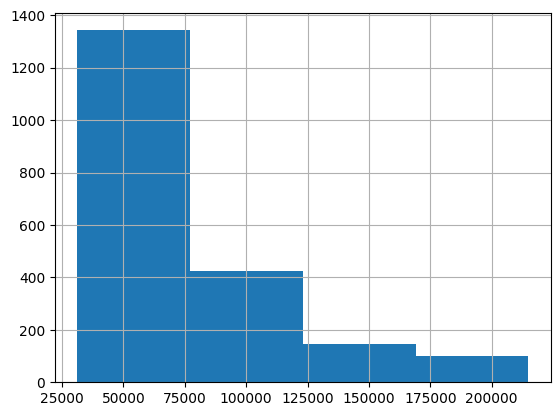

In [66]:
df_corollas_2022['valor'].hist(bins=4)

In [67]:
df_corollas_2022.query('valor < 75000')

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
406140,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,2,2002,31223.0
405652,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,1,2002,31329.0
392620,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,9,2002,31342.0
399030,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,3,2002,31670.0
403916,002027-3,Toyota,Corolla XLi 1.8/1.8 Flex 16V Mec.,2022,7,2002,32287.0
...,...,...,...,...,...,...,...
398929,002111-3,Toyota,Corolla XEi 2.0 Flex 16V Aut.,2022,5,2010,74874.0
400708,002111-3,Toyota,Corolla XEi 2.0 Flex 16V Aut.,2022,4,2010,74874.0
392592,002061-3,Toyota,Corolla XEi 1.8/1.8 Flex 16V Aut.,2022,11,2008,74880.0
401415,002061-3,Toyota,Corolla XEi 1.8/1.8 Flex 16V Aut.,2022,10,2008,74895.0


In [68]:
df_corollas_2022.query('valor >= 75000 and valor < 125000')

,codigoFipe,marca,modelo,anoModelo,mesReferencia,anoReferencia,valor
410869,002111-3,Toyota,Corolla XEi 2.0 Flex 16V Aut.,2022,10,2010,75000.0
410094,002060-5,Toyota,Corolla SE-G 1.8/1.8 Flex 16V Aut.,2022,5,2011,75025.0
393304,002060-5,Toyota,Corolla SE-G 1.8/1.8 Flex 16V Aut.,2022,6,2006,75043.0
411121,002102-4,Toyota,Corolla Fielder SW S 1.8 16V 136cv Aut,2022,3,2007,75057.0
395159,002060-5,Toyota,Corolla SE-G 1.8/1.8 Flex 16V Aut.,2022,11,2005,75061.0
...,...,...,...,...,...,...,...
404063,002112-1,Toyota,Corolla ALTIS 2.0 Flex 16V Aut.,2022,10,2019,122668.0
404564,002181-4,Toyota,Corolla GLi 2.0 16V Flex Aut.,2022,3,2021,123298.0
409239,002111-3,Toyota,Corolla XEi 2.0 Flex 16V Aut.,2022,11,2020,123427.0
412382,002111-3,Toyota,Corolla XEi 2.0 Flex 16V Aut.,2022,1,2021,123795.0
